# Pytorch

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## Dataset and Dataloader

`Dataset` and `Dataloader` are objects of convenience.

Both are classes. `Dataset` provides access to 'batteries-included' datasets that come with Pytorch for easy download.

In [2]:
dir(datasets)

['CIFAR10',
 'CIFAR100',
 'CLEVRClassification',
 'CREStereo',
 'Caltech101',
 'Caltech256',
 'CarlaStereo',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'Country211',
 'DTD',
 'DatasetFolder',
 'EMNIST',
 'ETH3DStereo',
 'EuroSAT',
 'FER2013',
 'FGVCAircraft',
 'FakeData',
 'FallingThingsStereo',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'Flowers102',
 'FlyingChairs',
 'FlyingThings3D',
 'Food101',
 'GTSRB',
 'HD1K',
 'HMDB51',
 'INaturalist',
 'ImageFolder',
 'ImageNet',
 'InStereo2k',
 'KMNIST',
 'Kinetics',
 'Kitti',
 'Kitti2012Stereo',
 'Kitti2015Stereo',
 'KittiFlow',
 'LFWPairs',
 'LFWPeople',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Middlebury2014Stereo',
 'Omniglot',
 'OxfordIIITPet',
 'PCAM',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'RenderedSST2',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SUN397',
 'SVHN',
 'SceneFlowStereo',
 'Sintel',
 'SintelStereo',
 'StanfordCars',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 'VisionDataset',
 'WIDERFace',


In [13]:
# download datasets through their api
# can grab train/test split with'train'
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)
print(len(train_data))
print(len(train_data[0]))

# each item has dimension (2,) with image (as tensor) and label
print(train_data[0]) 

60000
2
(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157

In [11]:
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)
print(len(test_data))
print(len(test_data[0]))

10000
2


In [12]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

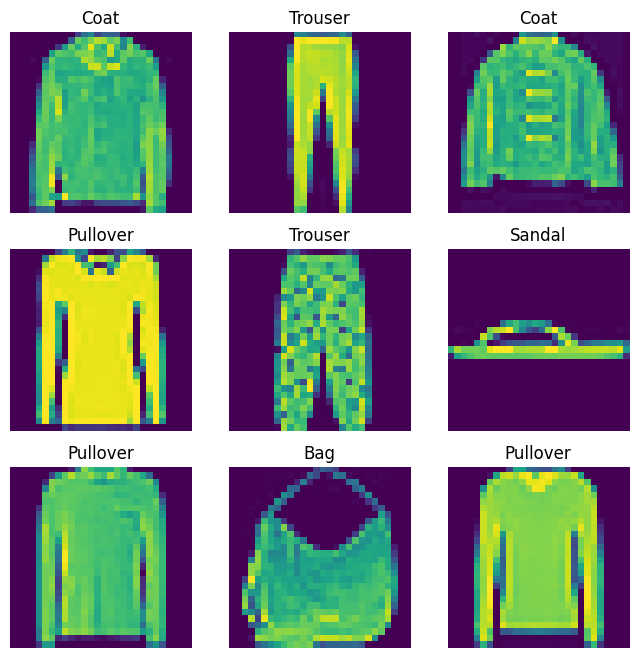

In [17]:
# control the plot figure by creating the object
# can break into subplots as below 
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze()) # can make grayscale with 'cmap="gray"'
    

## Dataset object

Requires implementing `__init__`, `__len__`, and `__getitem__`.

Datasets from `datasets` directory are instances of the `Dataset` class.

In [19]:
import os
import pandas as pd
from torchvision.io import read_image

In [21]:
class CustomImageDataset(Dataset): # pass the Dataset object as parent
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        '''Instantiate instance of Dataset class
        
        annotations_file <- (2,) <- (image_path, label)
        img_dir <- directory
        transform <- function to transform images
        target_transform <- function to transform labels
        '''
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        '''Return the number of samples in dataset
        '''
        return len(self.img_labels)

    def __getitem__(self, idx):
        '''Return the image and the label at the index in the dataset

        Able to transform the image
        Able to transform the label
        '''
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])

        img = read_image(img_path)  # converts the image to a tensor
        label = self.img_labels.iloc[idx, 1]

        if self.transform:
            img = self.transform(img)
        if self.target_transform:
            label = self.target_transform(label)

        return img, label

# Dataloader object

Operates on `Dataset` object to serve batches. 

`Dataset` object is set up to return one (img, label) tuple. `Dataloader` uses the `__getitem__()` method some batch size times to serve the model during training.

`tensor.squeeze()` or `torch.squeeze(tensor)` removes all dimensions of size 1 from a tensor.

In [23]:
from torch.utils.data import DataLoader

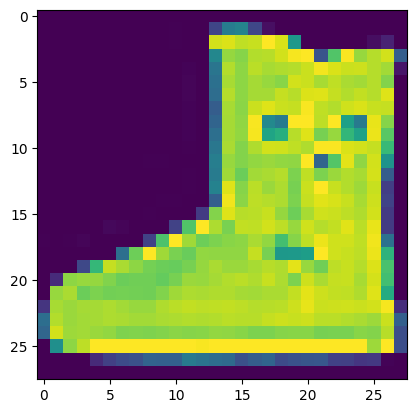

In [41]:
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

train_features, train_labels = next(iter(train_dataloader)) # gets 1 batch
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img)
plt.show()


In [25]:
train_features, train_labels = next(iter(train_dataloader))

In [29]:
# iter() is a built-in method that returns an iterator
iter(train_dataloader)

In [30]:
# next() is a built-in method that returns the next item from the iterator
next(iter(train_dataloader))

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0078,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

torch.Size([64, 1, 28, 28])
torch.Size([64])


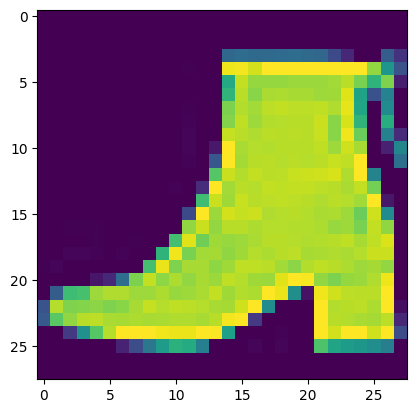

In [42]:
train_features, train_labesl = next(iter(train_dataloader))
print(train_features.size()) # 64 images with (1,28,28) dimension
print(train_labels.size())  # 64 labels as expected
img = train_features[0].squeeze() # squeeze() removes all dimensions with size 1
plt.imshow(img)
plt.show()